# Exploratory Data Analysis (EDA) and Business Insights

## Importing the required libraries for EDA

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## Loading the data into the data frame

In [230]:
# File paths
customers_file = '/content/Customers.csv'
products_file = '/content/Products.csv'
transactions_file = '/content/Transactions.csv'

# Loading datasets
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

print("Customers Dataset:")
display(customers_df.head())

print("\nProducts Dataset:")
display(products_df.head())

print("\nTransactions Dataset:")
display(transactions_df.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [231]:
# Display basic information about each dataset
customers_df.info()
products_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [232]:
# Check missing values in all datasets
print("Missing Values in Customers Dataset:")
print(customers_df.isnull().sum().sort_values(ascending=False))
print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum().sort_values(ascending=False))
print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum().sort_values(ascending=False))


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [233]:
# Convert date columns to datetime format
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

# Verify TotalValue consistency i.e. TotalValue should be equal to Price * Quantity
transactions_df["CalculatedTotal"] = transactions_df["Price"] * transactions_df["Quantity"]
total_value_mismatch = transactions_df[transactions_df["TotalValue"] != transactions_df["CalculatedTotal"]]

# Check for duplicate records
customers_duplicates = customers_df.duplicated().sum()
products_duplicates = products_df.duplicated().sum()
transactions_duplicates = transactions_df.duplicated().sum()

# Check for duplicate IDs
customer_id_duplicates = customers_df["CustomerID"].duplicated().sum()
product_id_duplicates = products_df["ProductID"].duplicated().sum()
transaction_id_duplicates = transactions_df["TransactionID"].duplicated().sum()

{
    "Total Value Mismatch Count": total_value_mismatch.shape[0],
    "Duplicate Rows": {
        "Customers": customers_duplicates,
        "Products": products_duplicates,
        "Transactions": transactions_duplicates,
    },
    "Duplicate IDs": {
        "Customers": customer_id_duplicates,
        "Products": product_id_duplicates,
        "Transactions": transaction_id_duplicates,
    },
}


{'Total Value Mismatch Count': 88,
 'Duplicate Rows': {'Customers': 0, 'Products': 0, 'Transactions': 0},
 'Duplicate IDs': {'Customers': 0, 'Products': 0, 'Transactions': 0}}

In [234]:
mismatched_transactions = transactions_df[transactions_df["TotalValue"] != transactions_df["CalculatedTotal"]]
print(mismatched_transactions)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
17         T00270      C0101      P034 2024-11-07 02:48:08         3   
29         T00218      C0148      P057 2024-01-17 19:40:55         3   
30         T00417      C0035      P057 2024-04-20 22:54:54         3   
31         T00492      C0120      P057 2024-08-08 05:40:02         3   
35         T00703      C0092      P057 2024-02-04 00:31:54         3   
..            ...        ...       ...                 ...       ...   
924        T00823      C0095      P079 2024-09-30 10:45:06         3   
935        T00660      C0057      P008 2024-09-23 16:46:01         3   
946        T00646      C0036      P091 2024-01-23 12:53:51         3   
947        T00793      C0054      P091 2024-10-07 17:48:28         3   
948        T00798      C0015      P091 2024-09-21 01:39:03         3   

     TotalValue   Price  CalculatedTotal  
17       651.15  217.05           651.15  
29       719.10  239.70           719.10  
30    

In [235]:
transactions_df.loc[transactions_df["TotalValue"] != transactions_df["CalculatedTotal"], "TotalValue"] = transactions_df["CalculatedTotal"]


## Customer Demographics and Behaviour

<ipython-input-236-ab6e5ee39964>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=customers_df["Region"], order=customers_df["Region"].value_counts().index, palette="viridis")


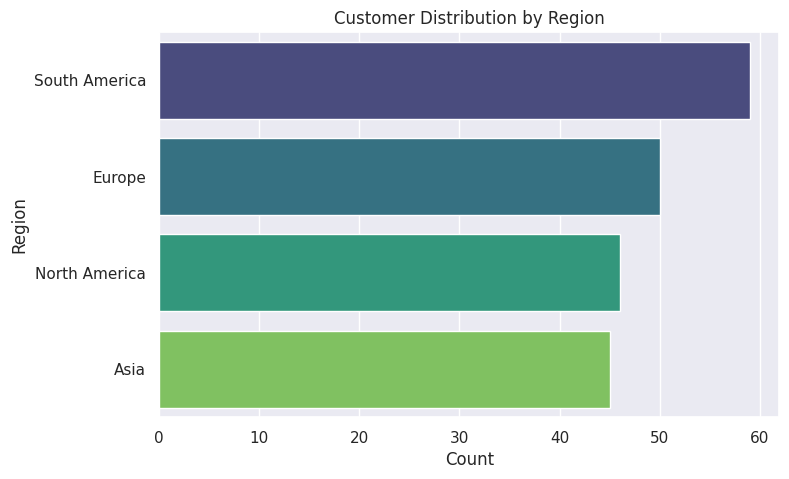

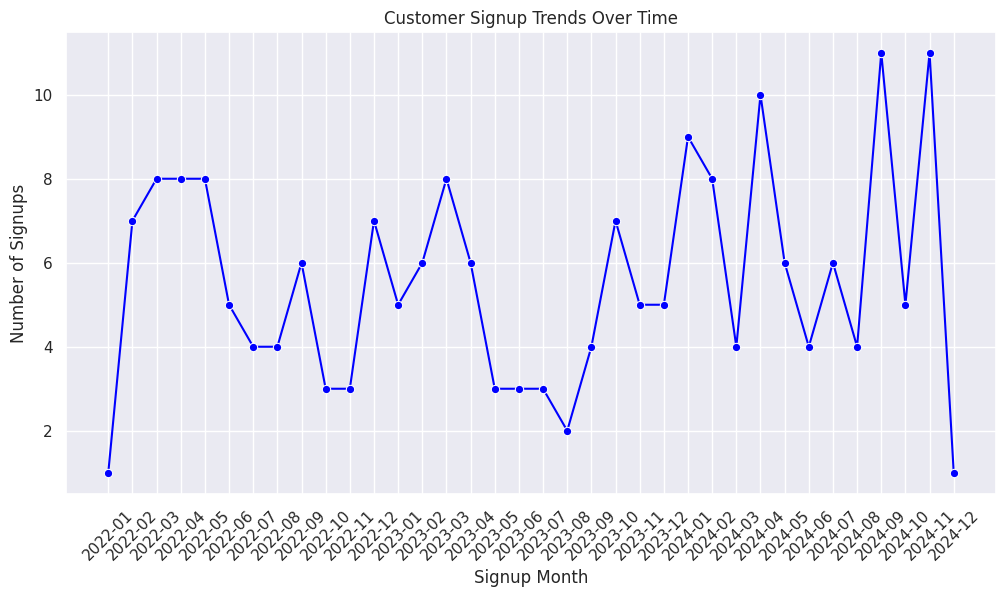

In [236]:
#To identify strongest markets
plt.figure(figsize=(8, 5))
sns.countplot(y=customers_df["Region"], order=customers_df["Region"].value_counts().index, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

#To analyse user growth patterns.
customers_df["SignupMonth"] = customers_df["SignupDate"].dt.to_period("M")
signup_trends = customers_df["SignupMonth"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=signup_trends.index.astype(str), y=signup_trends.values, marker="o", color="blue")
plt.xticks(rotation=45)
plt.xlabel("Signup Month")
plt.ylabel("Number of Signups")
plt.title("Customer Signup Trends Over Time")
plt.grid(True)
plt.show()



## Product Demographics

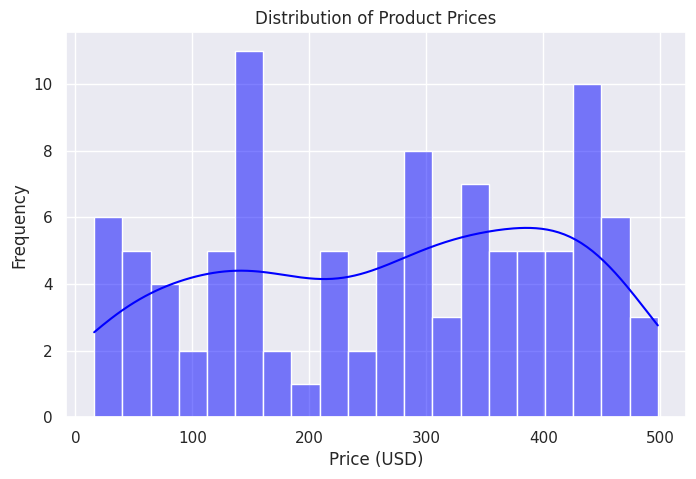

<ipython-input-237-6b4a7a8c5b6d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products["ProductName"], x=top_products["Quantity"], palette="cividis")


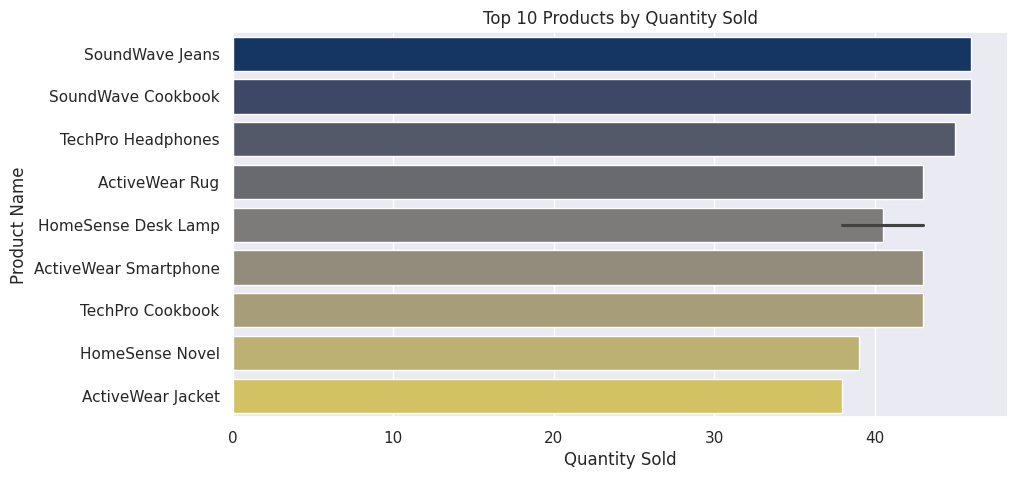

In [237]:
#To analyse price variations across products.
plt.figure(figsize=(8, 5))
sns.histplot(products_df["Price"], bins=20, kde=True, color="blue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

#To identify the most popular products.
top_products = transactions_df.groupby("ProductID")["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False).head(10)
top_products = top_products.merge(products_df, on="ProductID")

plt.figure(figsize=(10, 5))
sns.barplot(y=top_products["ProductName"], x=top_products["Quantity"], palette="cividis")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

## Sales & Revenue Trends

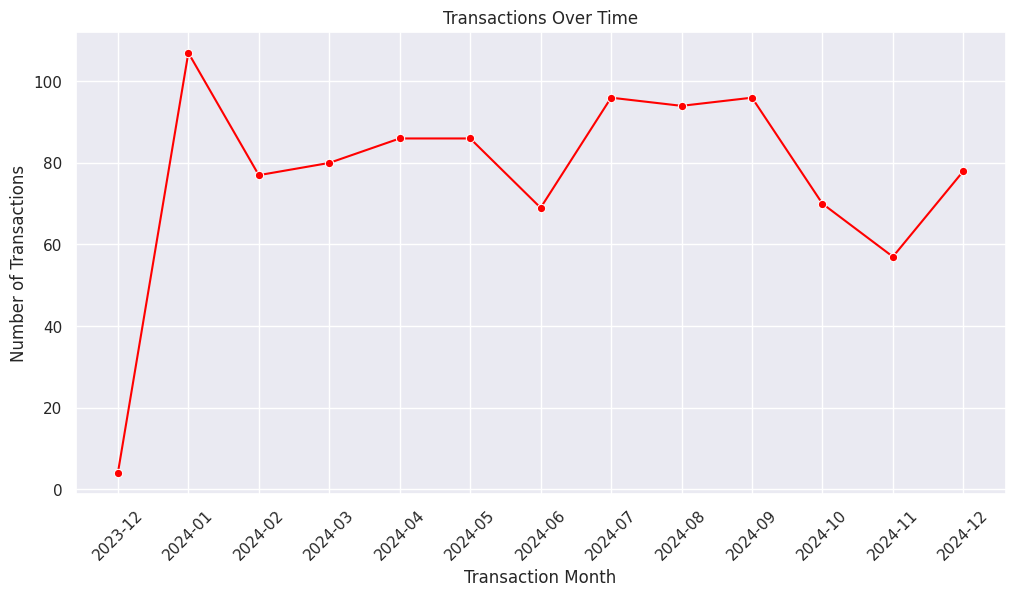

<ipython-input-238-b418ce1b9a4b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_customers["CustomerName"], x=top_customers["TotalValue"], palette="magma")


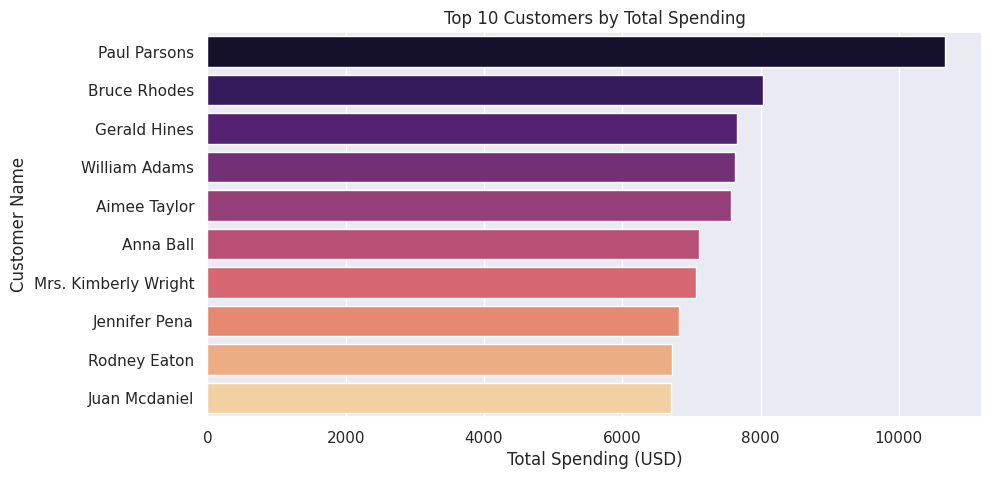

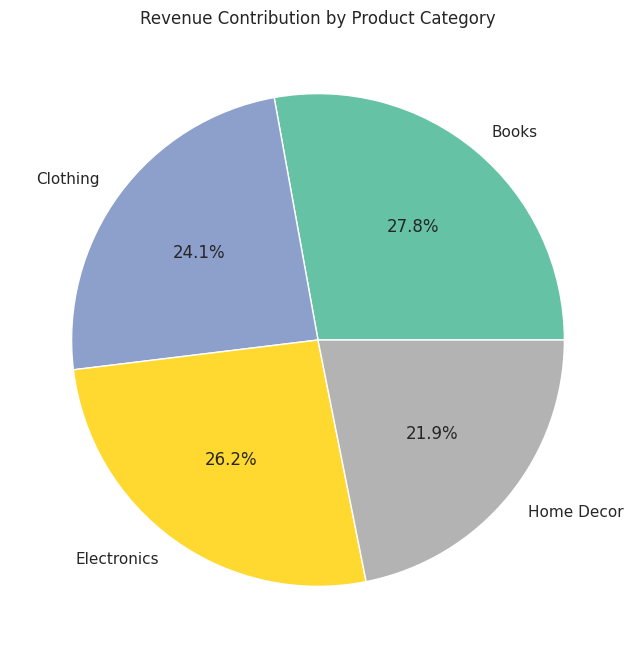

In [238]:
# To help spot seasonality or peak sales months.
transactions_df["TransactionMonth"] = transactions_df["TransactionDate"].dt.to_period("M")
transaction_trends = transactions_df["TransactionMonth"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_trends.index.astype(str), y=transaction_trends.values, marker="o", color="red")
plt.xticks(rotation=45)
plt.xlabel("Transaction Month")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.grid(True)
plt.show()


# To identify highest-value customers.
customer_spending = transactions_df.groupby("CustomerID")["TotalValue"].sum().reset_index()
top_customers = customer_spending.sort_values(by="TotalValue", ascending=False).head(10)
top_customers = top_customers.merge(customers_df, on="CustomerID")

plt.figure(figsize=(10, 5))
sns.barplot(y=top_customers["CustomerName"], x=top_customers["TotalValue"], palette="magma")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()

# To analyse which product categories generate the most revenue.
category_revenue = transactions_df.merge(products_df, on="ProductID").groupby("Category")["TotalValue"].sum()
plt.figure(figsize=(8, 8))
category_revenue.plot(kind="pie", autopct="%1.1f%%", cmap="Set2")
plt.title("Revenue Contribution by Product Category")
plt.ylabel("")
plt.show()


In [239]:
transactions_customers = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")
full_data = pd.merge(transactions_customers, products_df, on="ProductID", how="left")
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CalculatedTotal,TransactionMonth,CustomerName,Region,SignupDate,SignupMonth,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,2024-08,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,2024-05,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,2024-04,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,2024-03,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,902.04,2024-03,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [240]:
full_data = full_data.drop(columns=['Price_y']).rename(columns={"Price_x": "ProductPrice"})

In [241]:
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,CalculatedTotal,TransactionMonth,CustomerName,Region,SignupDate,SignupMonth,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,2024-08,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,2024-05,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,2024-04,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,2024-03,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,902.04,2024-03,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics


In [242]:
missing_values = full_data.isnull().sum()
missing_values

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
ProductPrice,0
CalculatedTotal,0
TransactionMonth,0
CustomerName,0


In [243]:
full_data.shape

(1000, 15)

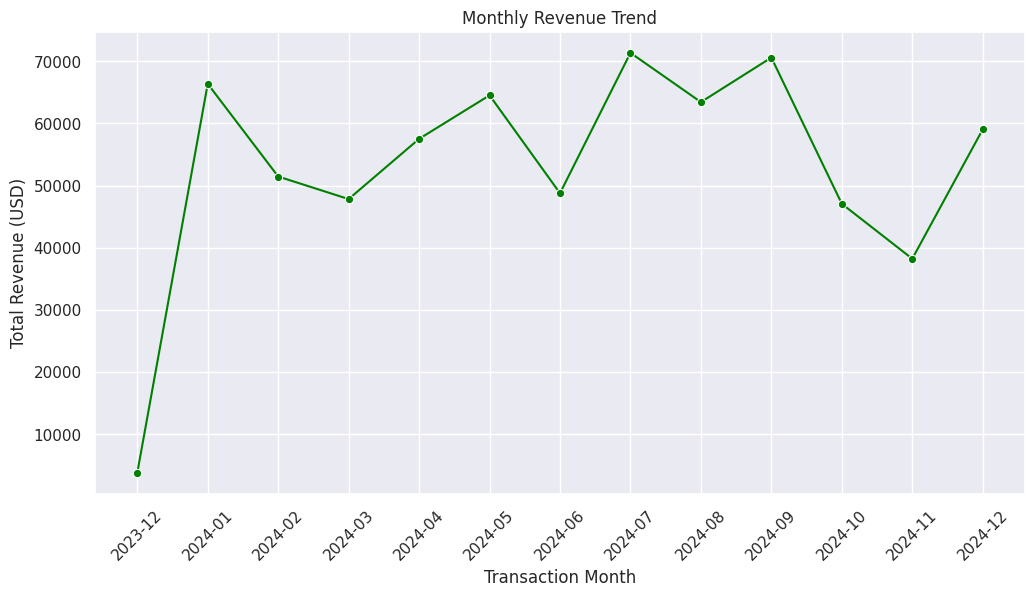

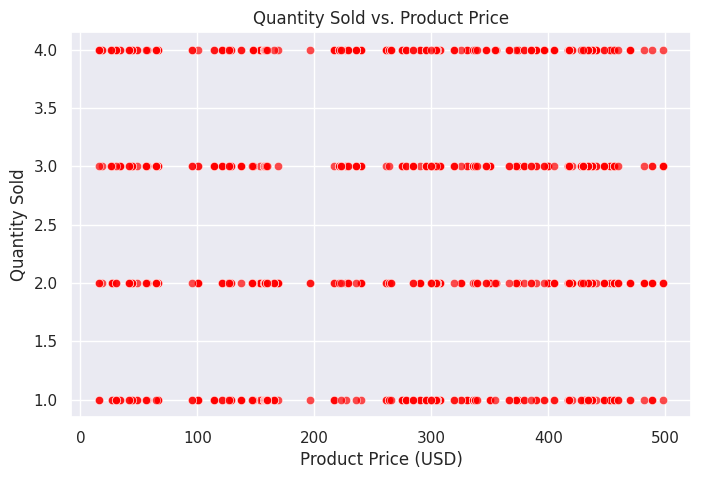

In [252]:
#Revenue Trends Over Time
full_data["TransactionMonth"] = full_data["TransactionDate"].dt.to_period("M")
monthly_revenue = full_data.groupby("TransactionMonth")["TotalValue"].sum().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker="o", color="green")
plt.xticks(rotation=45)
plt.xlabel("Transaction Month")
plt.ylabel("Total Revenue (USD)")
plt.title("Monthly Revenue Trend")
plt.grid(True)
plt.show()

# Quantity vs. Price Relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=full_data["ProductPrice"], y=full_data["Quantity"], alpha=0.7, color="red")
plt.title("Quantity Sold vs. Product Price")
plt.xlabel("Product Price (USD)")
plt.ylabel("Quantity Sold")
plt.show()

